    Original dataset: https://www.consumerfinance.gov/data-research/hmda/historic-data/?geo=ny&records=all-records&field_descriptions=labels
    
# So far from original dataset: 
1) Selected "no co-applicant" records from the column "co_applicant_ethnicity_name"
2) Filter columns:
    - action_taken_name
    - denial_reason_name_1
3) Created the column "action_taken":
    - df['action_taken'] = df['action_taken_name'].replace({
    'Loan originated': 'approved', 
    'Application approved but not accepted': 'approved',
    'Application denied by financial institution': 'denied'
})  
4) First feature selection:
    - df = df[

        ['loan_type_name',
        'property_type_name',
        'loan_purpose_name',
        'loan_amount_000s',
        'action_taken',
        'msamd_name',
        'applicant_ethnicity_name', 
        'applicant_race_name_1',
        'applicant_sex_name',
        'applicant_income_000s', 
        'denial_reason_name_1',
        'denial_reason_name_2',
        'denial_reason_name_3', 
        'rate_spread',
        'lien_status_name',
        'minority_population',
        'hud_median_family_income',
        'tract_to_msamd_income']

        ]
5) Excluded "Credit application incomplete" records from the column "denial_reason_name_1"
6) New column "ethnicity_race_sex"
7) New column 'loan_to_income_ratio'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('C:/Users/nonox/hmdaNY29082024_1407_2.csv')

In [2]:
print(df.columns)

Index(['loan_type_name', 'property_type_name', 'loan_purpose_name',
       'loan_amount_000s', 'action_taken', 'msamd_name',
       'applicant_ethnicity_name', 'applicant_race_name_1',
       'applicant_sex_name', 'applicant_income_000s', 'denial_reason_name_1',
       'denial_reason_name_2', 'denial_reason_name_3', 'rate_spread',
       'lien_status_name', 'minority_population', 'hud_median_family_income',
       'tract_to_msamd_income', 'ethnicity_race_sex'],
      dtype='object')


### A) Checking null values

In [3]:
null_values = df.isnull().sum()
print(null_values)

print("\n")
print(df.shape)


loan_type_name                   0
property_type_name               0
loan_purpose_name                0
loan_amount_000s                 0
action_taken                     0
msamd_name                   14936
applicant_ethnicity_name         0
applicant_race_name_1            0
applicant_sex_name               0
applicant_income_000s         6487
denial_reason_name_1        128269
denial_reason_name_2        145948
denial_reason_name_3        150748
rate_spread                 146140
lien_status_name                 0
minority_population            281
hud_median_family_income       281
tract_to_msamd_income          281
ethnicity_race_sex               0
dtype: int64


(151615, 19)


# B) manufactured_df
    
    To inspect "property_type_name" we pull out all records "manufactured housing" from the column "property_type_name" and create a new 
    df Since 221 houses of those kind are linked to empty values in tract_to_msamd_income, hud_median_family_income and minority_population related 
    columns data



In [4]:
# Filter the DataFrame to include only "Manufactured housing" records
manufactured_df = df[df['property_type_name'] == 'Manufactured housing']

# Display the filtered DataFrame
print(manufactured_df)


       loan_type_name    property_type_name loan_purpose_name  \
53       Conventional  Manufactured housing     Home purchase   
163      Conventional  Manufactured housing     Home purchase   
165      Conventional  Manufactured housing  Home improvement   
194      Conventional  Manufactured housing  Home improvement   
257      Conventional  Manufactured housing     Home purchase   
...               ...                   ...               ...   
151164   Conventional  Manufactured housing       Refinancing   
151175   Conventional  Manufactured housing     Home purchase   
151177   Conventional  Manufactured housing     Home purchase   
151209   Conventional  Manufactured housing  Home improvement   
151214   Conventional  Manufactured housing  Home improvement   

        loan_amount_000s action_taken  \
53                    23       denied   
163                   45       denied   
165                    5       denied   
194                   15       denied   
257           

In [5]:


# Saving the df



In [6]:
# Saving .csv file
manufactured_df.to_csv('C:/Users/nonox/tmp30082024_1644_2.csv', index=False)


# C) Checking for correlation 
     on the New data frame created. Check if the property type is liked to the missing values on tract_to_msamd_income 

In [7]:

# Identify rows where tract_to_msamd_income  is missing
missing_tract_to_msamd = manufactured_df[manufactured_df['tract_to_msamd_income'].isnull()]

# Count how many of the missing tract_to_msamd_income  values are linked to each property_type_name
missing_linked_counts = missing_tract_to_msamd['property_type_name'].value_counts()

# Display the result
print("Missing Census Tract Numbers linked to Property Type:")
print(missing_linked_counts)


Missing Census Tract Numbers linked to Property Type:
property_type_name
Manufactured housing    261
Name: count, dtype: int64


## C.1) Is Linked
1) The Number of 'Manufactured housing' records linked to null tract_to_msamd_income : 261 ALMOST MATCH THE TOTALITY OF columns related to census WE confirm the existance of a strong correlation.
2) Difference: we check for the difference between 281 and 261 = 20 values. Those 20 null values are within One-to-four family dwelling (other than manufactured housing) compared to "ethnicity_race_sex"; The majority are records belonging to the majority groups  {not hispanic or latino_white_female,  not hispanic or latino_white_mal}


### C.2) Checking the 20 values
    We check how those 20 values are distributed in the ethnicity race sex column

In [8]:
# Step 1: Filter for "One-to-four family dwelling (other than manufactured housing)" and null tract_to_msamd_income 
no_manufactured_df = df[(df['property_type_name'] == 'One-to-four family dwelling (other than manufactured housing)') & (df['tract_to_msamd_income'].isnull())]

# Step 2: Calculate the distribution in absolute counts
ethnicity_distribution_abs = no_manufactured_df['ethnicity_race_sex'].value_counts()

# Step 3: Calculate the distribution in percentages
ethnicity_distribution_pct = (ethnicity_distribution_abs / no_manufactured_df.shape[0]) * 100

# Step 4: Combine absolute counts and percentages into a single DataFrame
distribution = pd.DataFrame({
    'Absolute Counts': ethnicity_distribution_abs,
    'Percentage': ethnicity_distribution_pct
})

# Display the result
print(distribution)



                                                    Absolute Counts  \
ethnicity_race_sex                                                    
not hispanic or latino_white_male                                 7   
not hispanic or latino_white_female                               5   
not hispanic or latino_black or african america...                3   
hispanic or latino_white_male                                     2   
not hispanic or latino_black or african america...                1   
not hispanic or latino_asian_male                                 1   
not hispanic or latino_native hawaiian or other...                1   

                                                    Percentage  
ethnicity_race_sex                                              
not hispanic or latino_white_male                         35.0  
not hispanic or latino_white_female                       25.0  
not hispanic or latino_black or african america...        15.0  
hispanic or latino_white_male      

In [9]:
# We found that manufactured housing is linked directly to null values in the following columns: tract_to_msamd_income, hud_median_family_income and minority_population

# IMPORTANT:

There are 261 missing cases related to information on the "census-related" column, the proportion against the total number of records is
insignificat (0.001...) However, when we investigate futher, it is funny the distribution of those missing values as well as the fact that all
those missing values are linked to "denial" FURTHERMORE the rate in regards to the distinct groups... AND AND AND the ethnical_race_sex group affected the most is white man (also woman) no latino which indeed is the group with less denails hence deleting the missing inf. for example, would increse even more the disparity of no latino white man vs the rest.

Therefore deleting them is not an option. We will try to find a solution in this notebook.

# D) Checking Null values on 
### msamd_name 
    Checking msamd_name null values;
    We check how those null values get distributed among the different unique records from the column "ethnicity_race_sex"

##### 1) Among the different unique groups in the column "ethnicity_race_sex"
##### 2) Then we count the total idividuals for each unique group
##### 3) Check the % that null values represent within each unique group from the colum "ethnicity_race_sex"

    Typically no more than 5% of the data of each unique group should be deleted, even more if it is related to a minory which it is the case.



In [10]:
pd.set_option('display.max_rows', None)

# Count the number of null values in 'msamd_name' for each group in 'ethnicity_race_sex'
null_counts = df[df['msamd_name'].isnull()].groupby('ethnicity_race_sex').size()

# Count the total number of occurrences for each group in 'ethnicity_race_sex'
total_counts = df.groupby('ethnicity_race_sex').size()

# Combine the two Series into a DataFrame
contrast_df = pd.DataFrame({
    'null_count': null_counts,
    'total_count': total_counts
})

# Fill NaN values with 0 for groups with no null values in 'msamd_name'
contrast_df['null_count'] = contrast_df['null_count'].fillna(0).astype(int)
# Calculate the percentage of null_count over total_count
contrast_df['null_percentage'] = (contrast_df['null_count'] / contrast_df['total_count']) * 100

# Display the DataFrame with the new percentage column
print(contrast_df)



#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.size.html

                                                    null_count  total_count  \
ethnicity_race_sex                                                            
hispanic or latino_american indian or alaska na...           2           80   
hispanic or latino_american indian or alaska na...           6          159   
hispanic or latino_asian_female                              3           55   
hispanic or latino_asian_male                                2           71   
hispanic or latino_black or african american_fe...           4          383   
hispanic or latino_black or african american_male           11          339   
hispanic or latino_native hawaiian or other pac...           1           59   
hispanic or latino_native hawaiian or other pac...           3          101   
hispanic or latino_white_female                            114         3476   
hispanic or latino_white_male                              186         6199   
not hispanic or latino_american indian or alask...  

# E) Checking null values on
### census columns: tract_to_msamd_income, hud_median_family_income, minority_population 
Vs ethnicity_race_sex
    
    We will show the proportion of missing values for the census columns in regards to "etnicity race sex" plus "action taken" column:

    We found that missing values on tract_to_msamd_income has perfect correlation with denials, also ethnically the most

In [11]:
# Step 1: Filter rows where 'tract_to_msamd_income' is null
null_tract_income_df = df[df['tract_to_msamd_income'].isnull()]

# Step 2: Calculate the proportion of null 'tract_to_msamd_income' in each unique 'ethnicity_race_sex' group
proportion_nulls = (null_tract_income_df.groupby('ethnicity_race_sex').size() / 
                    df.groupby('ethnicity_race_sex').size()) * 100

# Display the proportion of null values in each unique group
print(proportion_nulls)


ethnicity_race_sex
hispanic or latino_american indian or alaska native_female                      NaN
hispanic or latino_american indian or alaska native_male                        NaN
hispanic or latino_asian_female                                                 NaN
hispanic or latino_asian_male                                                   NaN
hispanic or latino_black or african american_female                             NaN
hispanic or latino_black or african american_male                               NaN
hispanic or latino_native hawaiian or other pacific islander_female             NaN
hispanic or latino_native hawaiian or other pacific islander_male               NaN
hispanic or latino_white_female                                                 NaN
hispanic or latino_white_male                                              0.112921
not hispanic or latino_american indian or alaska native_female             0.284900
not hispanic or latino_american indian or alaska native_m

# F) Checking 
### The proportions of tract_to_msamd_income - ethnicity_race_sex - action_taken;

We observe which group get largest denials when there is missing inf on msamd_name.


In [12]:


# Step 1: Filter rows where 'tract_to_msamd_income' is null
null_tract_income_df = df[df['tract_to_msamd_income'].isnull()]

# Step 2: Calculate the proportion of null 'tract_to_msamd_income' in each unique group of 'ethnicity_race_sex' and 'action_taken'
proportion_nulls = (null_tract_income_df.groupby(['ethnicity_race_sex', 'action_taken']).size() /
                    df.groupby(['ethnicity_race_sex', 'action_taken']).size()) * 100

# Display the proportion of null values in each unique group
print(proportion_nulls)


ethnicity_race_sex                                                       action_taken
hispanic or latino_american indian or alaska native_female               approved             NaN
                                                                         denied               NaN
hispanic or latino_american indian or alaska native_male                 approved             NaN
                                                                         denied               NaN
hispanic or latino_asian_female                                          approved             NaN
                                                                         denied               NaN
hispanic or latino_asian_male                                            approved             NaN
                                                                         denied               NaN
hispanic or latino_black or african american_female                      approved             NaN
                                

# G) Checking
### The proportions of tract_to_msamd_income & msamd_name null - ethnicity_race_sex - action_taken;

We observe which group get largest denials when there is missing inf on msamd_name.

In [13]:
# Step 1: Filter for "One-to-four family dwelling (other than manufactured housing)" and null tract_to_msamd_income
no_manufactured_df = df[(df['property_type_name'] == 'One-to-four family dwelling (other than manufactured housing)') & (df['tract_to_msamd_income'].isnull())]

# Step 2: Group by ethnicity_race_sex and action_taken, then count occurrences
action_taken_distribution = no_manufactured_df.groupby(['ethnicity_race_sex', 'action_taken']).size().unstack(fill_value=0)

# Display the result
print("Distribution of Action Taken by Ethnicity, Race, and Sex (Absolute Counts):")
print(action_taken_distribution)


Distribution of Action Taken by Ethnicity, Race, and Sex (Absolute Counts):
action_taken                                        approved  denied
ethnicity_race_sex                                                  
hispanic or latino_white_male                              1       1
not hispanic or latino_asian_male                          0       1
not hispanic or latino_black or african america...         2       1
not hispanic or latino_black or african america...         0       1
not hispanic or latino_native hawaiian or other...         1       0
not hispanic or latino_white_female                        4       1
not hispanic or latino_white_male                          6       1


# H) Checking Null values

In [14]:
null_values = df.isnull().sum()
print(null_values)

print("\n")
print(df.shape)

loan_type_name                   0
property_type_name               0
loan_purpose_name                0
loan_amount_000s                 0
action_taken                     0
msamd_name                   14936
applicant_ethnicity_name         0
applicant_race_name_1            0
applicant_sex_name               0
applicant_income_000s         6487
denial_reason_name_1        128269
denial_reason_name_2        145948
denial_reason_name_3        150748
rate_spread                 146140
lien_status_name                 0
minority_population            281
hud_median_family_income       281
tract_to_msamd_income          281
ethnicity_race_sex               0
dtype: int64


(151615, 19)


# I) Cleaning
1) Drop 'msamd_name'
2) Eliminate the 20 values where 'One-to-four family dwelling (other than manufactured housing)') & tract_to_msamd_income are null
3) Create mirror columns for missing values on 'tract_to_msamd_income', 'minority_population', 'hud_median_family_income' AND filling null values with different imputation strategies.
4) Filling missing values with
    - "0" rate_spread 
    - or "unknown" (denial_reason_name_1, denial_reason_name_2, denial_reason_name_3)         

### I.1) Dropping "msamd_name"

In [15]:
# Drop the column 'msamd_name'
df = df.drop(columns=['msamd_name'])


print(df.shape)
print("\n")
 
print(df.isnull().sum())



(151615, 18)


loan_type_name                   0
property_type_name               0
loan_purpose_name                0
loan_amount_000s                 0
action_taken                     0
applicant_ethnicity_name         0
applicant_race_name_1            0
applicant_sex_name               0
applicant_income_000s         6487
denial_reason_name_1        128269
denial_reason_name_2        145948
denial_reason_name_3        150748
rate_spread                 146140
lien_status_name                 0
minority_population            281
hud_median_family_income       281
tract_to_msamd_income          281
ethnicity_race_sex               0
dtype: int64


# I.2) Remove the 20 rows
    where property_type_name is 'One-to-four family dwelling (other than manufactured housing)' and tract_to_msamd_income is null

In [16]:
print(df.shape)

(151615, 18)


In [17]:
# Remove rows where property_type_name is 'One-to-four family dwelling (other than manufactured housing)' and tract_to_msamd_income is null
df = df[~((df['property_type_name'] == 'One-to-four family dwelling (other than manufactured housing)') & (df['tract_to_msamd_income'].isnull()))]



In [18]:
print(df.shape)

(151595, 18)


## I.3) Mirror
1) we will create new columns that mirror the missing values for the original columns. we keep the original columns as well
2) We will fill out the missing values from the "original columns" with different strategies, otherwise the Logistic regression model won't work. For the imputation, we will consider each group from the column "ethnicity_race_sex" as benchmarking.

#### 1) Creating mirror columns

In [19]:
for col in ['minority_population', 'hud_median_family_income', 'tract_to_msamd_income']:
    df[f'{col}_missing'] = df[col].isnull().astype(int)

print(df.columns)

Index(['loan_type_name', 'property_type_name', 'loan_purpose_name',
       'loan_amount_000s', 'action_taken', 'applicant_ethnicity_name',
       'applicant_race_name_1', 'applicant_sex_name', 'applicant_income_000s',
       'denial_reason_name_1', 'denial_reason_name_2', 'denial_reason_name_3',
       'rate_spread', 'lien_status_name', 'minority_population',
       'hud_median_family_income', 'tract_to_msamd_income',
       'ethnicity_race_sex', 'minority_population_missing',
       'hud_median_family_income_missing', 'tract_to_msamd_income_missing'],
      dtype='object')


### 2.1) Imputation on   
#### hud_median_family_income
1) Imputation Strategy: Median from each group from the column "ethnicity_race_sex"
2) Why Median?: The median is less affected by outliers and provides a robust central tendency for the income data. Since income distribution can be skewed, using the median is often preferable to the mean, which can be pulled by extremely high or low values.


In [20]:
df['hud_median_family_income'] = df.groupby('ethnicity_race_sex')['hud_median_family_income']\
                                       .transform(lambda x: x.fillna(x.median()))

print(df['hud_median_family_income'].isnull().sum())

0


### 2.2) Imputation on   
####  minority_population
1) Description: This represents the percentage of the population in a census tract that belongs to minority groups.
2) Imputation Strategy: Median Imputation
3) Why Median?: Similar to income, population percentages can be skewed. The median provides a central value that isn't influenced by extreme percentages (e.g., tracts with nearly 100% or 0% minority populations).

In [21]:
df['minority_population'] = df.groupby('ethnicity_race_sex')['minority_population']\
                                  .transform(lambda x: x.fillna(x.median()))

# View the updated DataFrame
print(df['minority_population'].isnull().sum())

0


### 2.3) Imputation on   
####  tract_to_msamd_income
1) Description: This is the ratio of the median family income of the census tract to the median family income of the broader Metropolitan Statistical Area (MSA).
2) Imputation Strategy: Median Imputation
3) Why Median?: This ratio is a relative measure and can be affected by outliers. The median is a good measure to use for imputation as it reflects the central tendency without being distorted by extreme values.

In [22]:
df['tract_to_msamd_income'] = df.groupby('ethnicity_race_sex')['tract_to_msamd_income']\
                                    .transform(lambda x: x.fillna(x.median()))

print(df.head())

  loan_type_name                                 property_type_name  \
0   Conventional  One-to-four family dwelling (other than manufa...   
1   Conventional  One-to-four family dwelling (other than manufa...   
2   Conventional  One-to-four family dwelling (other than manufa...   
3   Conventional  One-to-four family dwelling (other than manufa...   
4   Conventional  One-to-four family dwelling (other than manufa...   

  loan_purpose_name  loan_amount_000s action_taken applicant_ethnicity_name  \
0     Home purchase               356       denied   Not Hispanic or Latino   
1       Refinancing               100     approved   Not Hispanic or Latino   
2  Home improvement               250       denied   Not Hispanic or Latino   
3       Refinancing               315     approved   Not Hispanic or Latino   
4     Home purchase               117     approved   Not Hispanic or Latino   

       applicant_race_name_1 applicant_sex_name  applicant_income_000s  \
0                      W

# Checking Null values

In [23]:
print(df.shape)
print("\n")
print(df.isnull().sum())

(151595, 21)


loan_type_name                           0
property_type_name                       0
loan_purpose_name                        0
loan_amount_000s                         0
action_taken                             0
applicant_ethnicity_name                 0
applicant_race_name_1                    0
applicant_sex_name                       0
applicant_income_000s                 6487
denial_reason_name_1                128255
denial_reason_name_2                145930
denial_reason_name_3                150728
rate_spread                         146121
lien_status_name                         0
minority_population                      0
hud_median_family_income                 0
tract_to_msamd_income                    0
ethnicity_race_sex                       0
minority_population_missing              0
hud_median_family_income_missing         0
tract_to_msamd_income_missing            0
dtype: int64


# I.4.1) Filling out null values on
#### 'denial_reason_name_1', 'denial_reason_name_2', 'denial_reason_name_3' & 'rate_spread'

In [24]:
df[['rate_spread']] = df[['rate_spread']].fillna(0)

In [25]:
df[['denial_reason_name_1', 'denial_reason_name_2', 'denial_reason_name_3']] = df[['denial_reason_name_1', 'denial_reason_name_2', 'denial_reason_name_3']].fillna('unknown')

In [26]:
null_values = df.isnull().sum()
print(null_values)

print("\n")
print(df.shape)


loan_type_name                         0
property_type_name                     0
loan_purpose_name                      0
loan_amount_000s                       0
action_taken                           0
applicant_ethnicity_name               0
applicant_race_name_1                  0
applicant_sex_name                     0
applicant_income_000s               6487
denial_reason_name_1                   0
denial_reason_name_2                   0
denial_reason_name_3                   0
rate_spread                            0
lien_status_name                       0
minority_population                    0
hud_median_family_income               0
tract_to_msamd_income                  0
ethnicity_race_sex                     0
minority_population_missing            0
hud_median_family_income_missing       0
tract_to_msamd_income_missing          0
dtype: int64


(151595, 21)


# I.4.1) Filling out Null values On
#### applicant_income_000s  column with the weighted mean



Using the weighted mean to fill null values in the "salary" column based on the unique groups in the "ethnicity_race_sex" column will allows us to account for the unique characteristics of each group while imputing missing values.

In addition, salaries can vary significantly across different demographic groups due to a variety of factors such as education, occupation, or experience levels. By imputing the missing values within each group, we make sure that the imputation respects these variations, leading to more accurate estimations.


Advantages:

1) It preserves the salary differences between different demographic groups, which could be important for your bias analysis.
2) It uses the existing patterns in your data rather than arbitrary values.
3) It helps maintain the overall distribution of salaries within each group.
4) It allows you to be explicit about group differences in your imputation strategy.

In [27]:
# Step 1: Calculate weights
df['weight'] = df.groupby(['ethnicity_race_sex', 'applicant_income_000s'])['applicant_income_000s'].transform('count')

# Step 2: Calculate weighted mean for each group
def weighted_mean(group):
    return (group['applicant_income_000s'] * group['weight']).sum() / group['weight'].sum()

group_weighted_means = df.groupby('ethnicity_race_sex').apply(weighted_mean)

# Step 3: Impute missing values witht he previous calculations
df['applicant_income_000s'] = df.apply(
    lambda row: group_weighted_means[row['ethnicity_race_sex']] 
    if pd.isnull(row['applicant_income_000s']) 
    else row['applicant_income_000s'], 
    axis=1
)

# Remove the temporary weight column if not needed for further analysis
#df = df.drop('weight', axis=1)

#https://www.geeksforgeeks.org/applying-lambda-functions-to-pandas-dataframe/
#https://www.geeksforgeeks.org/python-pandas-dataframe-transform/
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.transform.html

Clarification about "seeing the result twice":
1) First print: The code prints the entire imputation_check DataFrame, which includes all groups, both those with and without discrepancies.
2) Second print: After checking if all groups have correct values (which they don't in this case), the code then prints the groups with discrepancies.
However, since all groups show discrepancies (all have is_correct = False), this second print is identical to the first one.

In [28]:
def calculate_weighted_mean(group):
    return (group['applicant_income_000s'] * group['weight']).sum() / group['weight'].sum()

# Recalculate weighted means
recalculated_means = df.groupby('ethnicity_race_sex').apply(calculate_weighted_mean)

# Function to check if values match the weighted mean
def check_imputation(group):
    group_mean = recalculated_means[group.name]
    all_values = group['applicant_income_000s']
    
    is_correct = np.allclose(all_values, group_mean, rtol=1e-5, atol=1e-8)
    return pd.Series({
        'total_count': len(all_values),
        'is_correct': is_correct,
        'calculated_mean': group_mean,
        'actual_mean': all_values.mean()
    })

# Perform the check
imputation_check = df.groupby('ethnicity_race_sex').apply(check_imputation)

print(imputation_check)

# Check if all groups have correct values
all_correct = imputation_check['is_correct'].all()
print(f"All groups have correct values: {all_correct}")

# If not all correct, show discrepancies
if not all_correct:
    discrepancies = imputation_check[~imputation_check['is_correct']]
    print("\nGroups with discrepancies:")
    print(discrepancies)

#https://www.geeksforgeeks.org/numpy-allclose-in-python/
    #https://numpy.org/doc/stable/reference/generated/numpy.allclose.html
#https://pandas.pydata.org/docs/reference/api/pandas.Series.html

                                                    total_count  is_correct  \
ethnicity_race_sex                                                            
hispanic or latino_american indian or alaska na...           80       False   
hispanic or latino_american indian or alaska na...          159       False   
hispanic or latino_asian_female                              55       False   
hispanic or latino_asian_male                                71       False   
hispanic or latino_black or african american_fe...          383       False   
hispanic or latino_black or african american_male           339       False   
hispanic or latino_native hawaiian or other pac...           59       False   
hispanic or latino_native hawaiian or other pac...          101       False   
hispanic or latino_white_female                            3476       False   
hispanic or latino_white_male                              6197       False   
not hispanic or latino_american indian or alask...  

# J) Creation of 'loan_to_income_ratio' column

In [29]:
df['loan_to_income_ratio'] = (df['loan_amount_000s'] / df['applicant_income_000s']).round(2)
print(df['loan_to_income_ratio'].head())

0    3.10
1    1.19
2    3.47
3    5.43
4    2.05
Name: loan_to_income_ratio, dtype: float64


In [30]:
print(df.isnull().sum())

loan_type_name                         0
property_type_name                     0
loan_purpose_name                      0
loan_amount_000s                       0
action_taken                           0
applicant_ethnicity_name               0
applicant_race_name_1                  0
applicant_sex_name                     0
applicant_income_000s                  0
denial_reason_name_1                   0
denial_reason_name_2                   0
denial_reason_name_3                   0
rate_spread                            0
lien_status_name                       0
minority_population                    0
hud_median_family_income               0
tract_to_msamd_income                  0
ethnicity_race_sex                     0
minority_population_missing            0
hud_median_family_income_missing       0
tract_to_msamd_income_missing          0
weight                              6487
loan_to_income_ratio                   0
dtype: int64


In [31]:
## Figures represent the times of their annual income. E.g.
# if = to 3.10, means that this borrower's loan amount is 3.10 times their annual income.

# Drop the temp column weight

In [32]:
df = df.drop('weight', axis=1)

# Checking for Null values

In [33]:
null_values = df.isnull().sum()
print(null_values)

print("\n")
print(df.shape)

loan_type_name                      0
property_type_name                  0
loan_purpose_name                   0
loan_amount_000s                    0
action_taken                        0
applicant_ethnicity_name            0
applicant_race_name_1               0
applicant_sex_name                  0
applicant_income_000s               0
denial_reason_name_1                0
denial_reason_name_2                0
denial_reason_name_3                0
rate_spread                         0
lien_status_name                    0
minority_population                 0
hud_median_family_income            0
tract_to_msamd_income               0
ethnicity_race_sex                  0
minority_population_missing         0
hud_median_family_income_missing    0
tract_to_msamd_income_missing       0
loan_to_income_ratio                0
dtype: int64


(151595, 22)


In [34]:
df.to_csv("hmdaNY_31082024_1817_cleaned.csv", index=True)
print("saved")

saved


# Charts 1.
### denied - approved, approved %

### % applications per group

### % applications per group excluding privileged groups

<Figure size 2000x1000 with 0 Axes>

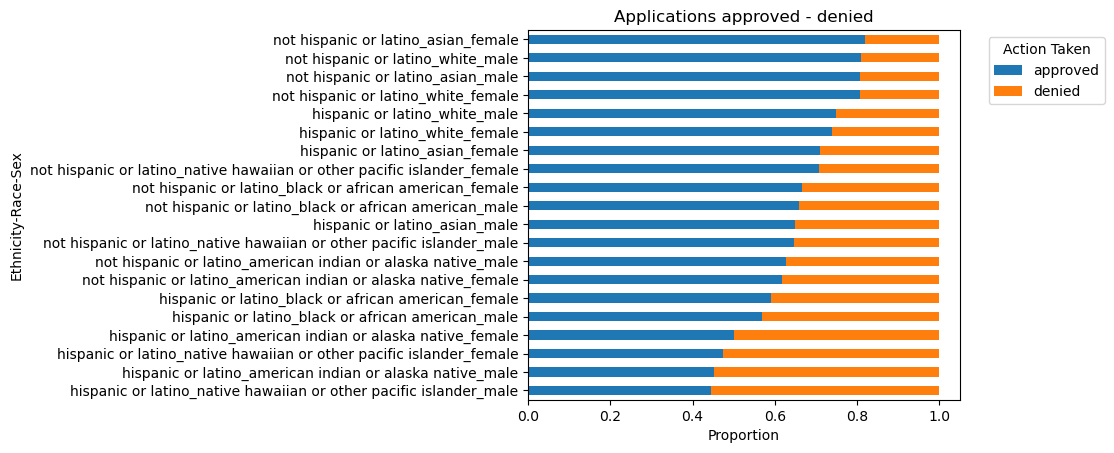

In [56]:
# Calculate and plot the distribution of action_taken for each ethnicity_race_sex group
action_distribution = df.groupby(['ethnicity_race_sex', 'action_taken']).size().unstack(fill_value=0)
action_distribution_pct = action_distribution.div(action_distribution.sum(axis=1), axis=0)

# Sort the data by 'approved' column
sorted_index = action_distribution_pct['approved'].sort_values(ascending=True).index
action_distribution_pct_sorted = action_distribution_pct.loc[sorted_index]

# Display
plt.figure(figsize=(20, 10))  
action_distribution_pct_sorted.plot(kind='barh', stacked=True)

plt.title('Applications approved - denied')
plt.xlabel('Proportion')
plt.ylabel('Ethnicity-Race-Sex')

plt.legend(title='Action Taken', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.subplots_adjust(right=0.8)  

plt.show()

#https://stackoverflow.com/questions/25068384/bbox-to-anchor-and-loc-in-matplotlib
#https://www.geeksforgeeks.org/python-pandas-dataframe-div/

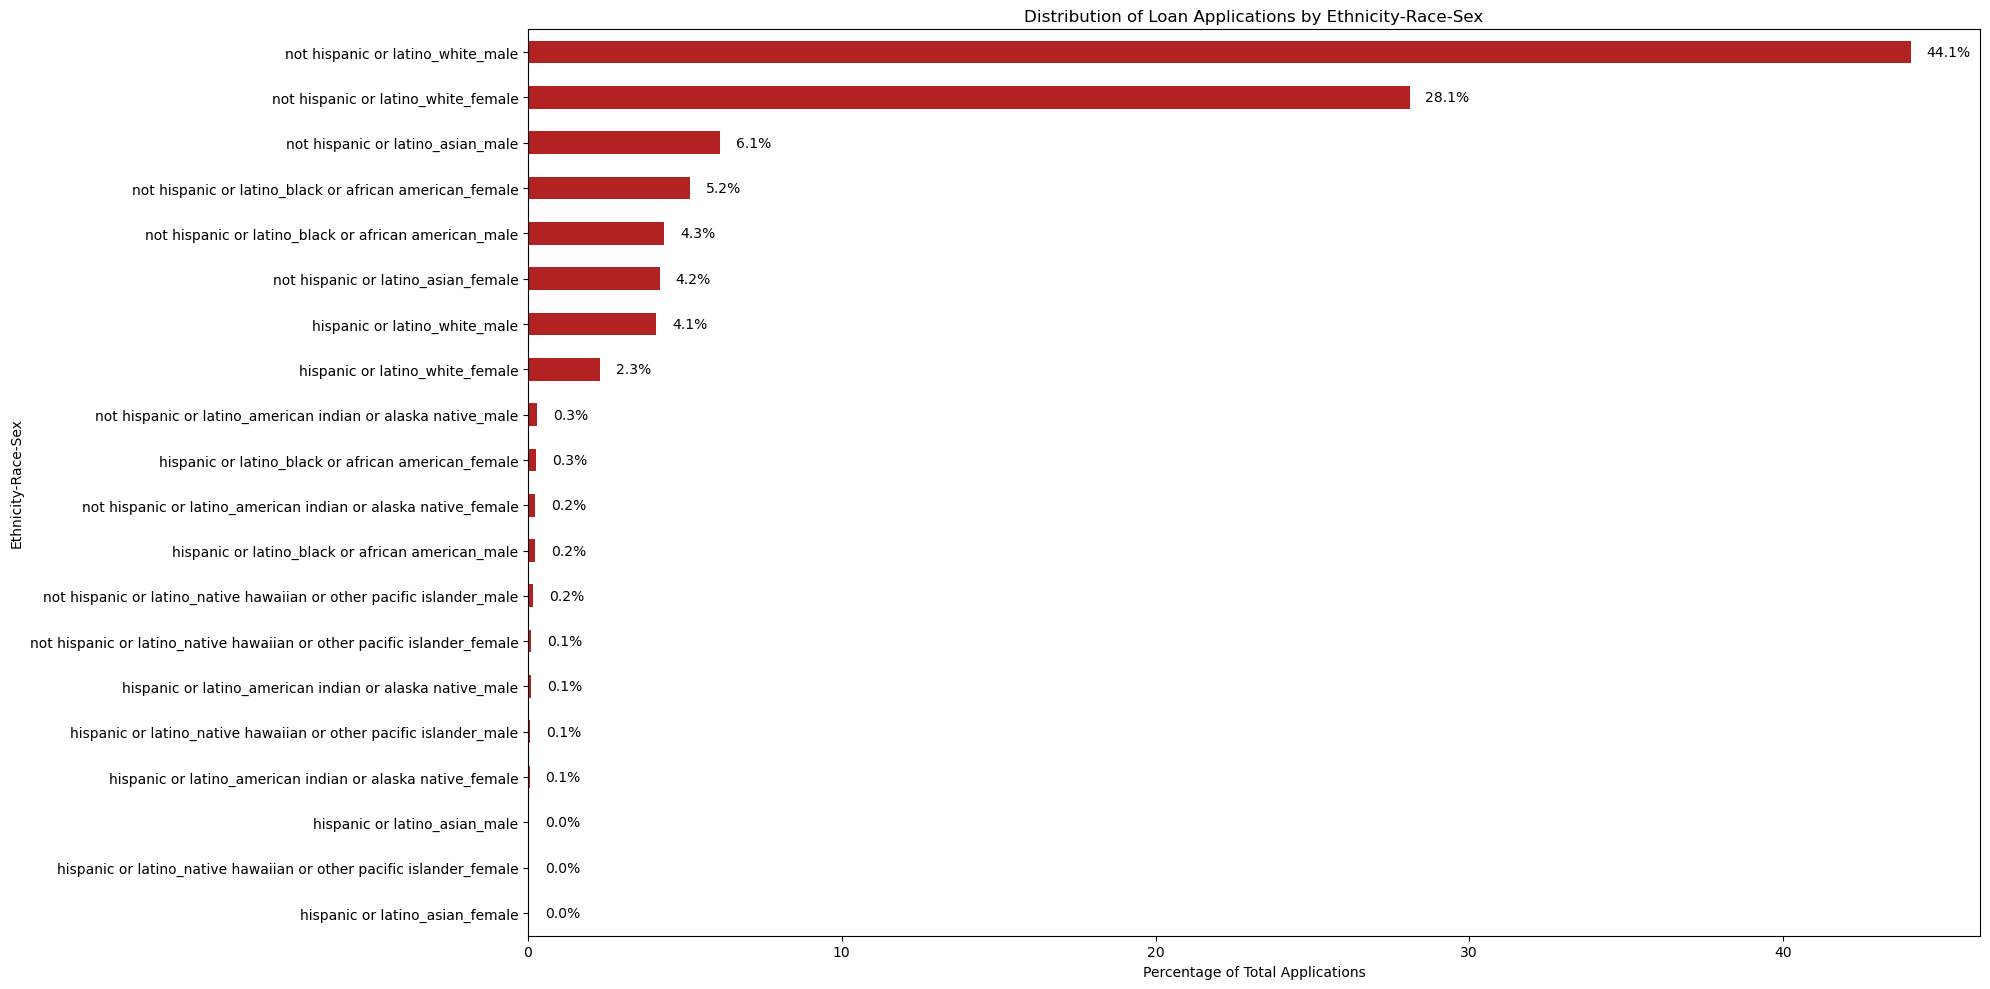

In [52]:
# Total number of applications (approved + denied) for each ethnicity_race_sex group
total_applications = df.groupby('ethnicity_race_sex')['action_taken'].count()

# % distribution of total applications
total_applications_pct = (total_applications / total_applications.sum()) * 100

# Sorting data
total_applications_pct_sorted = total_applications_pct.sort_values(ascending=True)

# Plotting results
plt.figure(figsize=(20, 10))
ax = total_applications_pct_sorted.plot(kind='barh', color='firebrick')

# Labels
plt.title('Distribution of Loan Applications by Ethnicity-Race-Sex')
plt.xlabel('Percentage of Total Applications')
plt.ylabel('Ethnicity-Race-Sex')

# % on bars
for i, v in enumerate(total_applications_pct_sorted):
    ax.text(v + 0.5, i, f'{v:.1f}%', va='center')


plt.tight_layout()
plt.show()


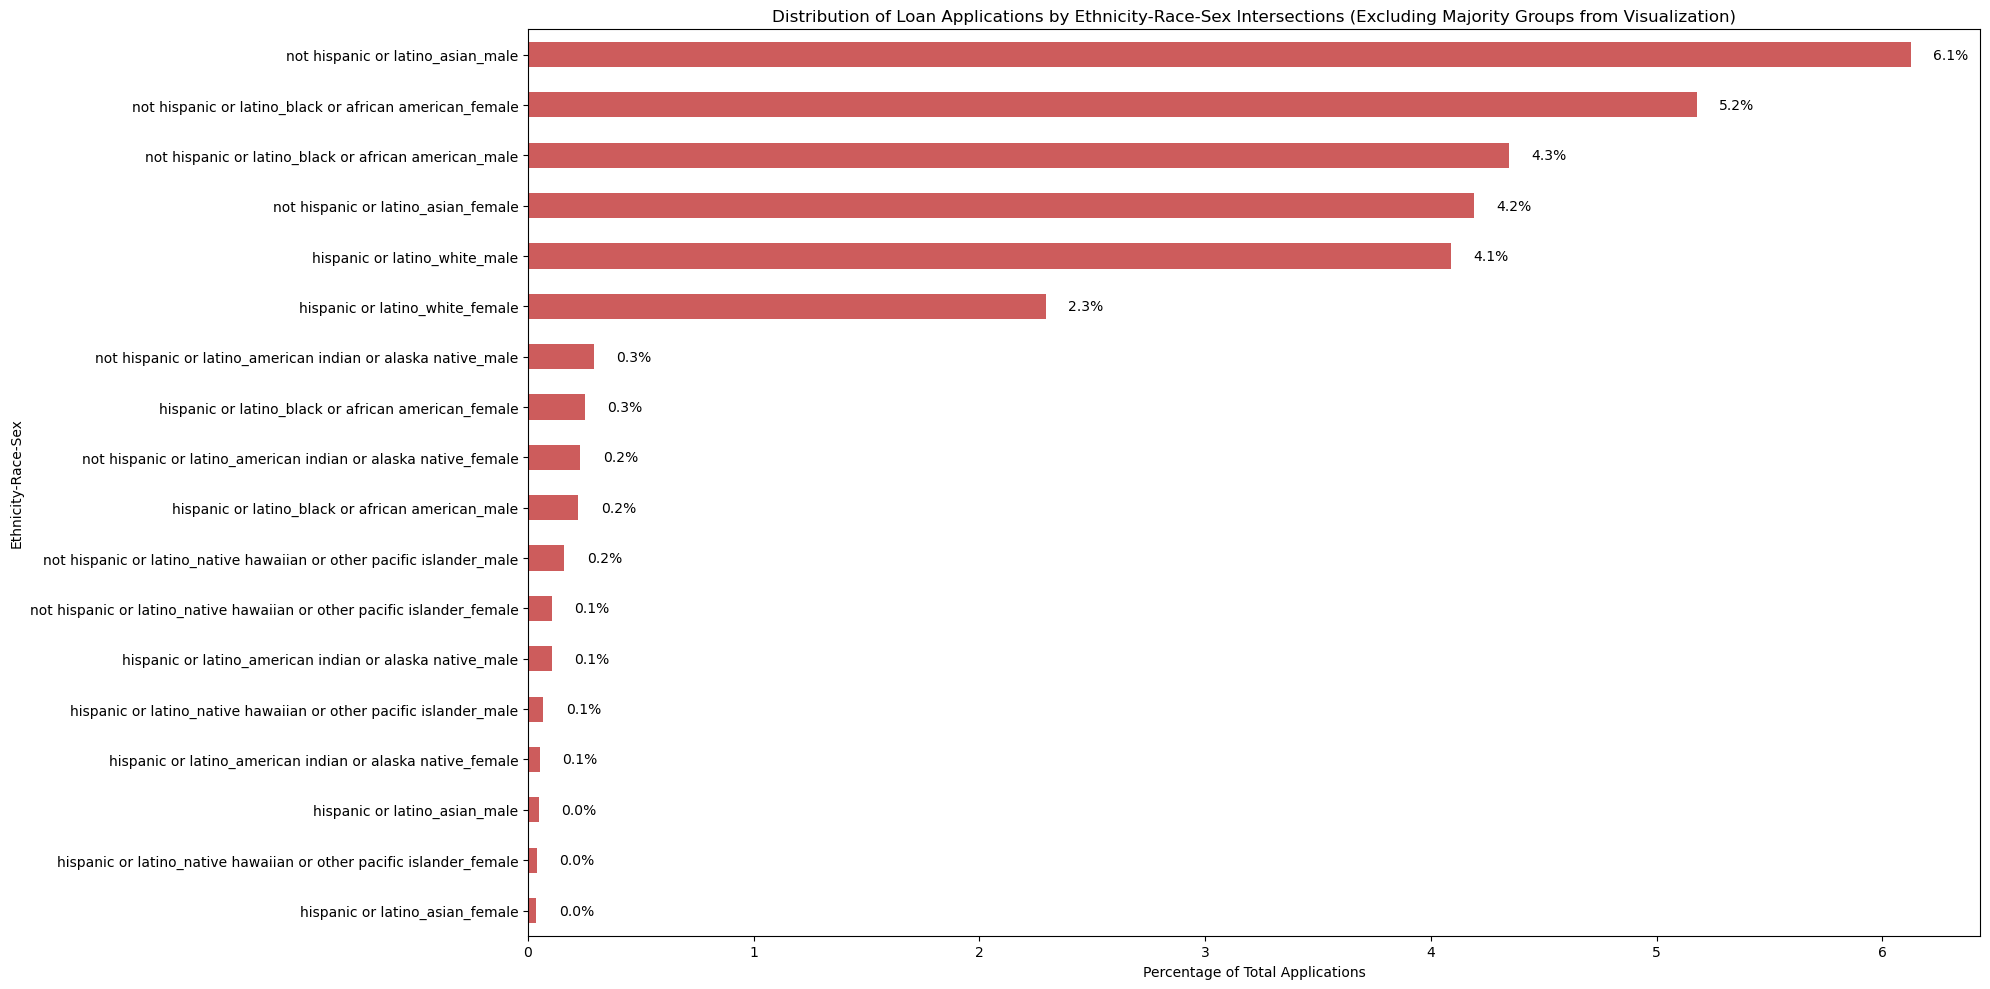

In [51]:
# Filtering out "not hispanic or latino_white_female" and "not hispanic or latino_white_male"
total_applications = df.groupby('ethnicity_race_sex')['action_taken'].count()

# Total number of applications (approved + denied) for each ethnicity_race_sex group
total_applications_pct = (total_applications / total_applications.sum()) * 100

# Filtering out "not hispanic or latino_white_female" and "not hispanic or latino_white_male" from visualization
visualization_pct = total_applications_pct.drop(['not hispanic or latino_white_female', 'not hispanic or latino_white_male'])

# Sortting data
visualization_pct_sorted = visualization_pct.sort_values(ascending=True)

# Plotting
plt.figure(figsize=(20, 10))
ax = visualization_pct_sorted.plot(kind='barh', color='indianred')

# Labels
plt.title('Distribution of Loan Applications by Ethnicity-Race-Sex Intersections (Excluding Majority Groups from Visualization)')
plt.xlabel('Percentage of Total Applications')
plt.ylabel('Ethnicity-Race-Sex')

# % for each bar
for i, v in enumerate(visualization_pct_sorted):
    ax.text(v + 0.1, i, f'{v:.1f}%', va='center')

plt.tight_layout()
plt.show()


# Chart 2
### approval rates

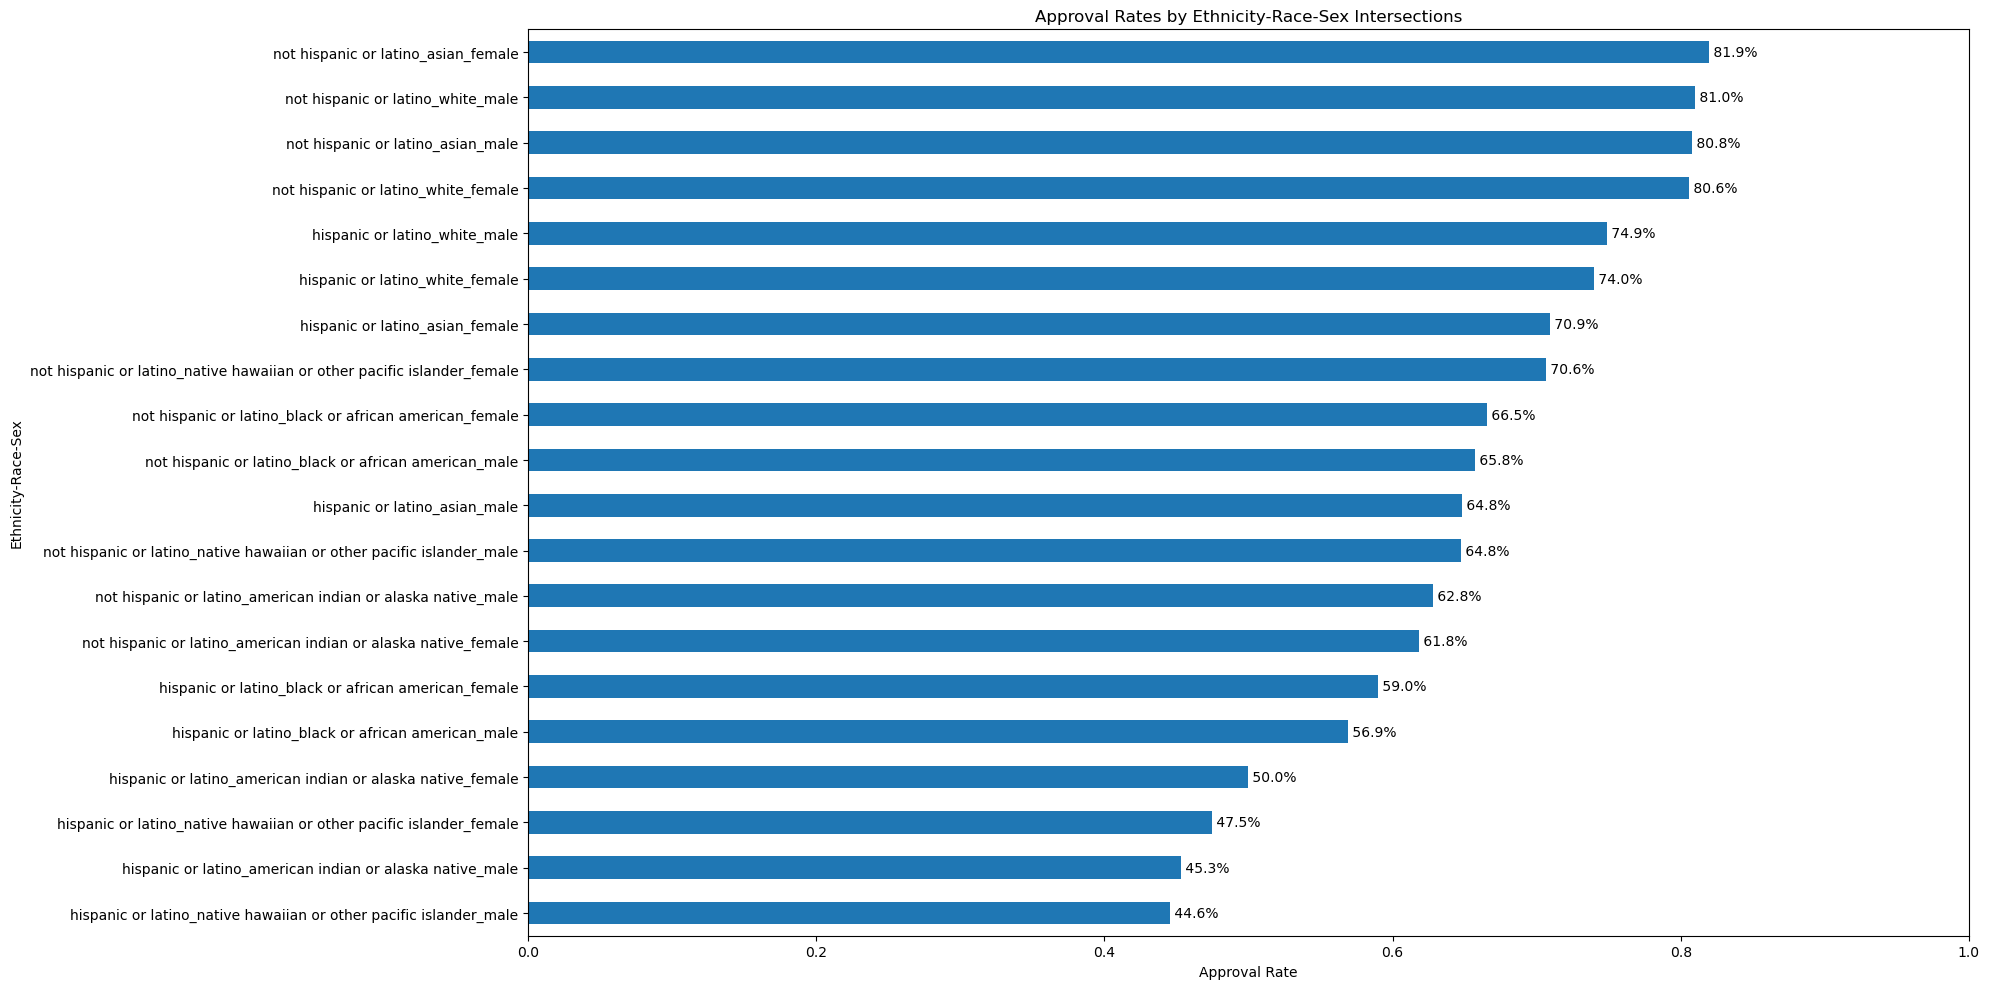

In [39]:

df['approved'] = (df['action_taken'] == 'approved').astype(int)
approval_rates = df.groupby('ethnicity_race_sex')['approved'].mean().sort_values(ascending=True)


plt.figure(figsize=(20, 10))
ax = approval_rates.plot(kind='barh')

plt.title('Approval Rates by Ethnicity-Race-Sex Intersections')
plt.xlabel('Approval Rate')
plt.ylabel('Ethnicity-Race-Sex')
plt.xlim(0, 1)  # Set x-axis limits from 0 to 1 for percentage

# Adding percentage labels
for i, v in enumerate(approval_rates):
    ax.text(v, i, f' {v:.1%}', va='center')

plt.tight_layout()
plt.show()

#https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html
#https://github.com/DJ4seasons/Python_Basic4beginners

# Chart 3
#### Outliers

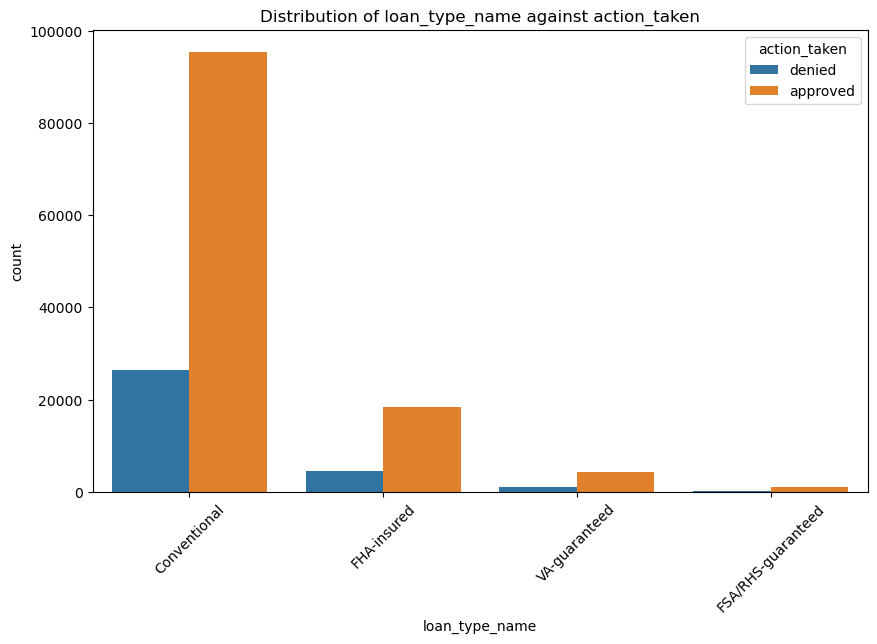

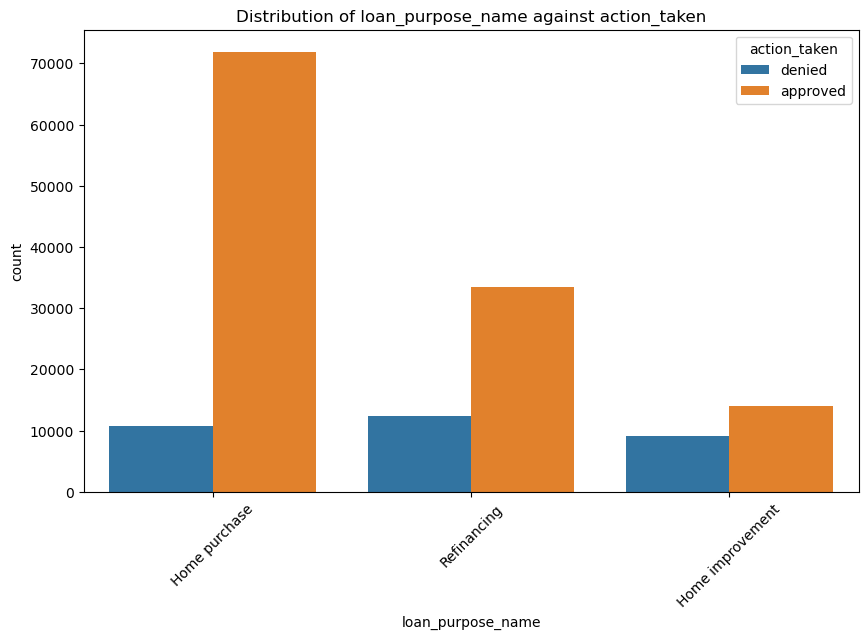

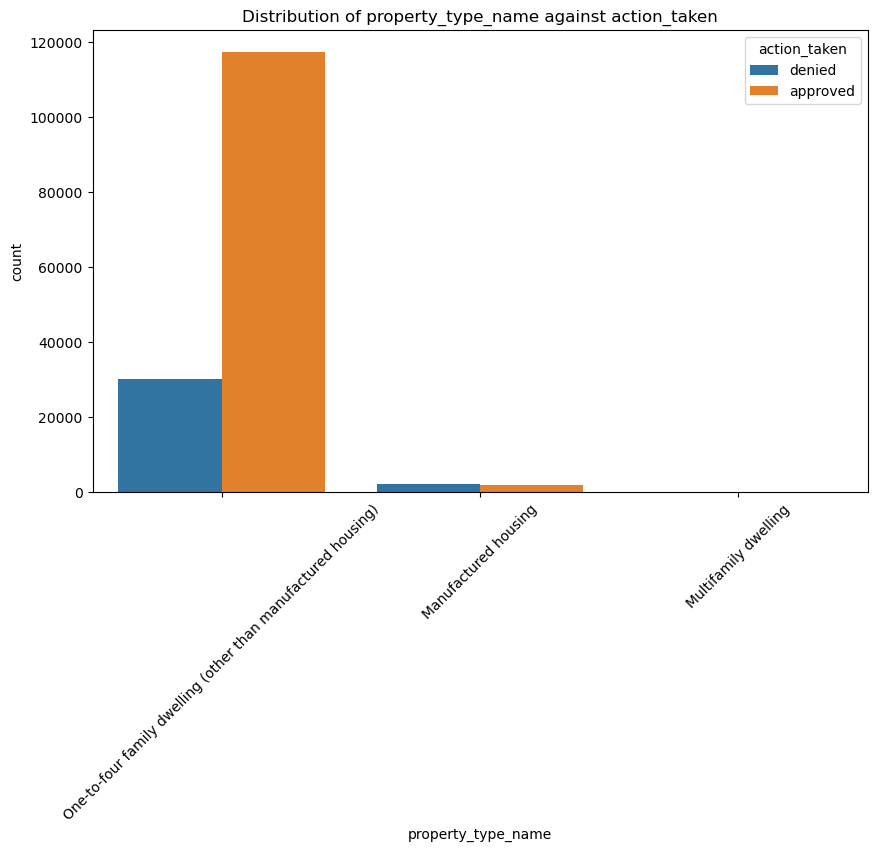

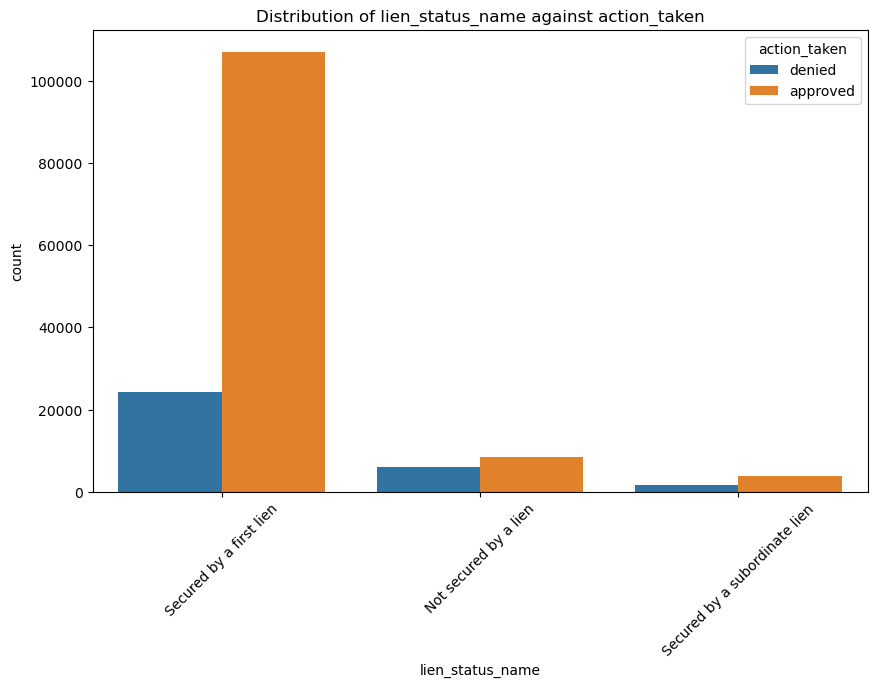

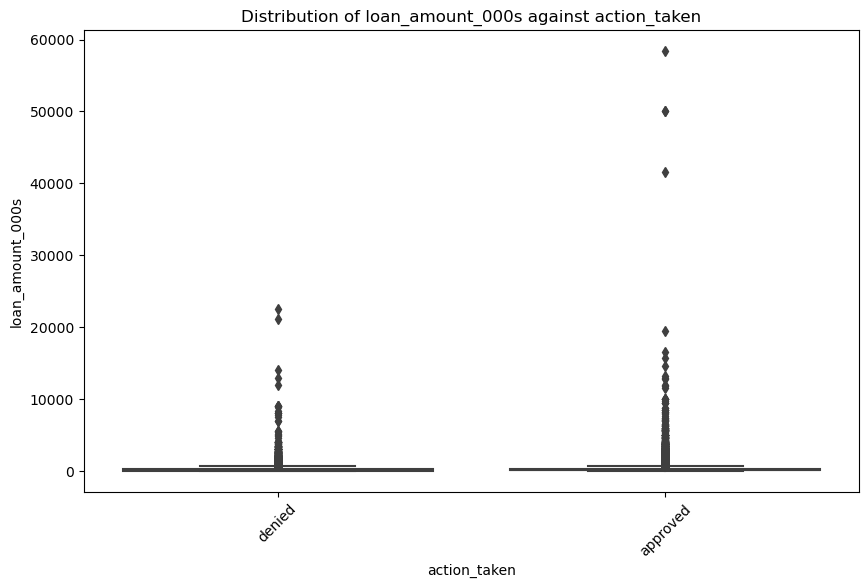

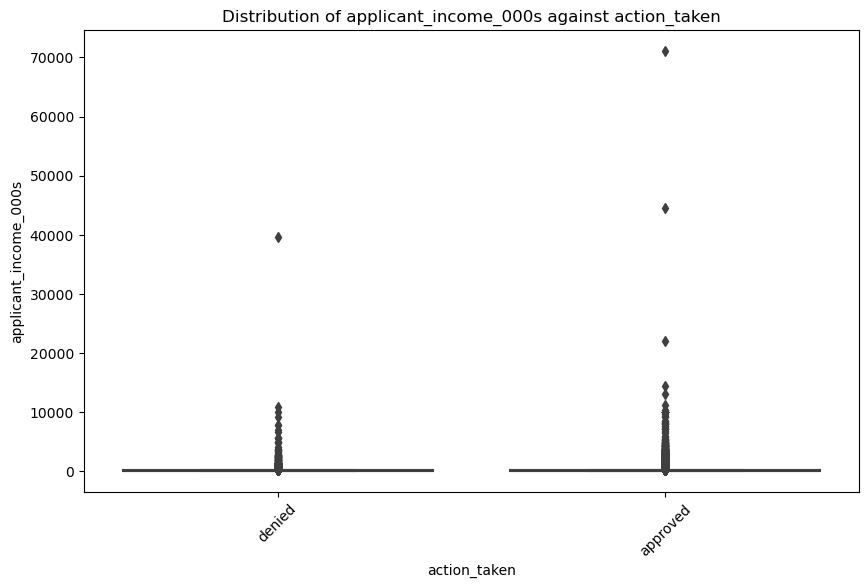

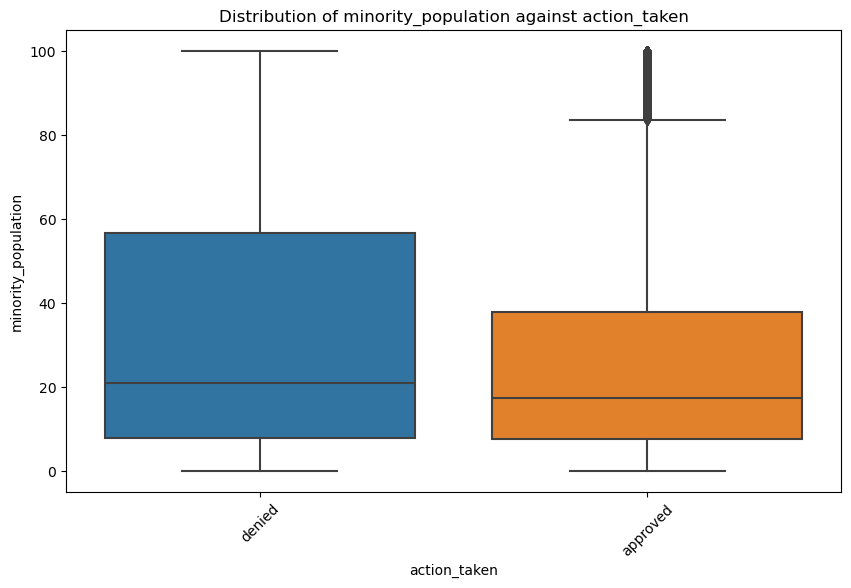

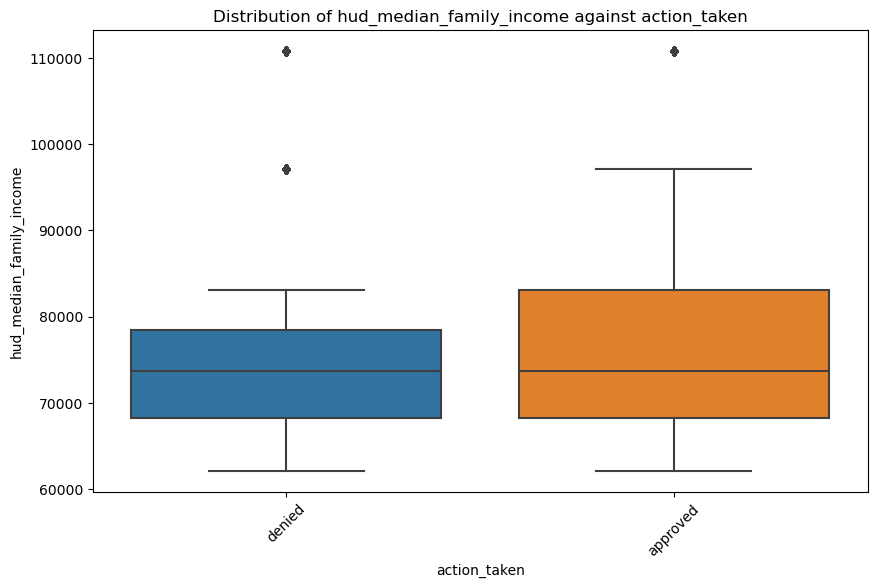

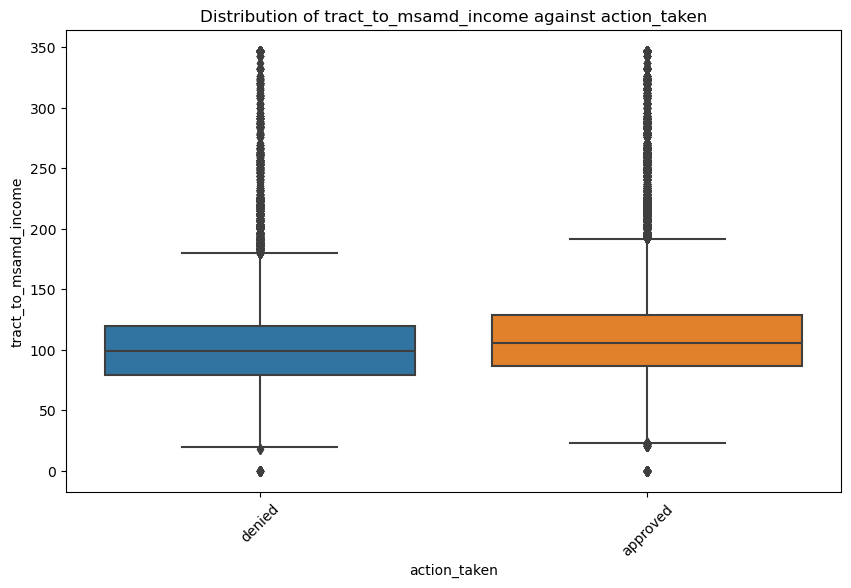

In [40]:
categorical_columns = ['loan_type_name', 'loan_purpose_name', 'property_type_name', 'lien_status_name']
numerical_columns = ['loan_amount_000s', 'applicant_income_000s', 'minority_population', 
                     'hud_median_family_income', 'tract_to_msamd_income']
target_column = 'action_taken'

# Plotting categorical columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue=target_column)
    
    plt.title(f'Distribution of {col} against {target_column}')
    plt.xticks(rotation=45)
    
    plt.show()

# Plotting numerical columns
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=target_column, y=col)
    
    plt.title(f'Distribution of {col} against {target_column}')
    plt.xticks(rotation=45)
    plt.show()

#https://seaborn.pydata.org/generated/seaborn.countplot.html
#https://seaborn.pydata.org/generated/seaborn.boxplot.html

# K) Addressing outliers on
### applicant_income_000s and loan_amount_000s

In [ ]:
# 'applicant_income_000s'
income_lower_bound = np.percentile(df['applicant_income_000s'], 1)
income_upper_bound = np.percentile(df['applicant_income_000s'], 99)

# 'loan_amount_000s'
loan_lower_bound = np.percentile(df['loan_amount_000s'], 1)
loan_upper_bound = np.percentile(df['loan_amount_000s'], 99)

# Filtering
df = df[
    (df['applicant_income_000s'] >= income_lower_bound) & 
    (df['applicant_income_000s'] <= income_upper_bound) &
    (df['loan_amount_000s'] >= loan_lower_bound) & 
    (df['loan_amount_000s'] <= loan_upper_bound)
]

# L) Checking for outliers
### corrected*

In [ ]:

categorical_columns = ['loan_type_name',
                       'loan_purpose_name',
                       'property_type_name',
                       'lien_status_name'
                      ]

numerical_columns = ['loan_amount_000s',
                     'applicant_income_000s',
                     'minority_population', 
                     'hud_median_family_income',
                     'tract_to_msamd_income'
                    ]

target_column = 'action_taken'

# categorical columns
for col in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue=target_column)
    
    plt.title(f'Distribution of {col} against {target_column}')
    plt.xticks(rotation=45)
    
    plt.show()

# numerical columns
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x=target_column, y=col)
    
    plt.title(f'Distribution of {col} against {target_column}')
    plt.xticks(rotation=45)
    
    plt.show()

In [ ]:
print(df.columns)

# M) Checking columns type
### looking for categorical columns to apply encoding.

In [ ]:
import pandas as pd

# List of columns from your dataset
columns = ['loan_type_name',
           'property_type_name',
           'loan_purpose_name', 
           'loan_amount_000s',
           'action_taken', 
           'applicant_ethnicity_name',
           'applicant_race_name_1',
           'applicant_sex_name',
           'applicant_income_000s',
           'denial_reason_name_1',
           'denial_reason_name_2',
           'denial_reason_name_3',
           'rate_spread',
           'lien_status_name', 
           'minority_population',
           'hud_median_family_income', 
           'tract_to_msamd_income',
           'ethnicity_race_sex',
           'minority_population_missing',
           'hud_median_family_income_missing',
           'tract_to_msamd_income_missing', 
          ]

# Check each column and print whether it is numerical or not
for column in columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        print(f"Column '{column}' is numerical.")
    else:
        print(f"Column '{column}' is not numerical.")

#https://pandas.pydata.org/docs/reference/api/pandas.api.types.is_numeric_dtype.html

# Ramdon Checking 
### lien_status

In [ ]:
print(df["lien_status_name"].value_counts())

# N) Selecting the columns
### and apply feature engineering filter out the columns we want ommting previous columns created.

# Important:

    census track number: 
    it is categorical data as each number is a code representing an geographical area. we are already considerating geographical area with other columns.

In [ ]:
df = df[

    [   'action_taken',
        'applicant_income_000s',
        'ethnicity_race_sex',
        'hud_median_family_income',
        'hud_median_family_income_missing',
        'lien_status_name',
        'loan_amount_000s',
        'loan_purpose_name',
        'loan_type_name',
        'loan_to_income_ratio',
        'minority_population',
        'minority_population_missing',
        'property_type_name',
        'tract_to_msamd_income',
        'tract_to_msamd_income_missing'
    ]
]


In [ ]:
# Saving the df

df.to_csv('C:/Users/nonox/hmdaNY_02092024_1603_Ready_2.csv', index=False)

Original dataset: https://www.consumerfinance.gov/data-research/hmda/historic-data/?geo=ny&records=all-records&field_descriptions=labels
    
# So far from original dataset: 
1) Selected "no co-applicant" records from the column "co_applicant_ethnicity_name"
2) Filter columns:
    - action_taken_name
    - denial_reason_name_1
3) Created the column "action_taken":
    - df['action_taken'] = df['action_taken_name'].replace({
    'Loan originated': 'approved', 
    'Application approved but not accepted': 'approved',
    'Application denied by financial institution': 'denied'
})  
4) First feature selection:
    - df = df[

        ['loan_type_name',
        'property_type_name',
        'loan_purpose_name',
        'loan_amount_000s',
        'action_taken',
        'msamd_name',
        'applicant_ethnicity_name', 
        'applicant_race_name_1',
        'applicant_sex_name',
        'applicant_income_000s', 
        'denial_reason_name_1',
        'denial_reason_name_2',
        'denial_reason_name_3', 
        'rate_spread',
        'lien_status_name',
        'minority_population',
        'hud_median_family_income',
        'tract_to_msamd_income']

        ]
5) Excluded "Credit application incomplete" records from the column "denial_reason_name_1"
6) New column "ethnicity_race_sex"
7) Preprocessing diverse:
    - Drop 'msamd_name'
    - Eliminate the 20 values where 'One-to-four family dwelling (other than manufactured housing)') & tract_to_msamd_income are null
    - Create mirror columns for missing values on 'tract_to_msamd_income', 'minority_population', 'hud_median_family_income' AND
    - Filling null values with Median from each group from the column "ethnicity_race_sex"
    - New column "loan_to_application_ratio"
    - Filling missing values with
        + "0" rate_spread 
        + or "unknown" (denial_reason_name_1, denial_reason_name_2, denial_reason_name_3)   
8) Adressed outliers on applicant_income_000s and loan_amount_000s